<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%B3%B4%EB%84%88%EC%8A%A4_Pandas_%EC%A3%BC%EC%8B%9D_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas를 활용한 데이터 분석

## 주식 데이터 처리

In [ ]:
!pip install pandas_datareader

In [ ]:
# thonny 등에서 실행해야 함.
import pandas_datareader.data as web, datetime, matplotlib.pyplot as plt
df = web.DataReader('005930.KS', 'yahoo', datetime.datetime(2018,1,1), datetime.datetime.now())
plt.plot(df['Close']); plt.show()

In [ ]:
# 이동평균선 추가
# Thonny를 관리자 모드로 열어 pandas_datareader 패키지를 설치해 둔다.

import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt

# 그래프에 한글 출력이 가능하도록 설정해 둔다.
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/Gulim.ttc" # 굴림체
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 주식 정보를 가져올 시작 날짜와 끝 날짜
start = datetime(2018, 1, 1)
end = datetime.now()
# 주가와 이동평균선 그래프 그리기
df = web.DataReader('003490.KS', 'yahoo', start, end)
plt.plot(df['Close'], label='종가')
ma_20 = df['Close'].rolling(window=20).mean()
ma_60 = df['Close'].rolling(window=60).mean()
ma_120 = df['Close'].rolling(window=120).mean()
plt.plot(ma_20, label='20일')
plt.plot(ma_60, label='60일')
plt.plot(ma_120, label='120일')
plt.title('대한항공 종가 시세')
plt.legend(loc='best')
plt.grid()
plt.show()

## Covid19 데이터 조작하기
- 다운로드 : https://ourworldindata.org/coronavirus/country/south-korea 
- covid19.csv 파일로 저장
- new_cases(신규확진자)에 음수가 있으므로 확인 필요

In [ ]:
# 한글 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
# 소수점 이하 2자리, 세자리 콤마 사용
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('/content/covid19.csv')
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
110265,ZWE,Africa,Zimbabwe,2021-08-13,"119,508.00",754.00,580.43,"4,073.00",26.00,38.29,"8,040.68",50.73,39.05,274.04,1.75,2.58,0.68,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,"56,484.00",nan,nan,nan,nan,"3,800.00",73.15,"14,862,927.00",42.73,19.60,2.82,1.88,"1,899.78",21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,nan
110266,ZWE,Africa,Zimbabwe,2021-08-14,"119,853.00",345.00,566.14,"4,090.00",17.00,37.71,"8,063.89",23.21,38.09,275.18,1.14,2.54,0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"3,234,909.00","2,036,008.00","1,198,901.00",nan,nan,"54,502.00",21.76,13.70,8.07,nan,"3,667.00",73.15,"14,862,927.00",42.73,19.60,2.82,1.88,"1,899.78",21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,nan
110267,ZWE,Africa,Zimbabwe,2021-08-15,"120,088.00",235.00,537.29,"4,109.00",19.00,29.86,"8,079.70",15.81,36.15,276.46,1.28,2.01,0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"3,289,258.00","2,064,023.00","1,225,235.00",nan,"54,349.00","57,530.00",22.13,13.89,8.24,nan,"3,871.00",73.15,"14,862,927.00",42.73,19.60,2.82,1.88,"1,899.78",21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,nan
110268,ZWE,Africa,Zimbabwe,2021-08-16,"120,088.00",0.00,462.14,"4,109.00",0.00,27.14,"8,079.70",0.00,31.09,276.46,0.00,1.83,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"3,345,985.00","2,091,259.00","1,254,726.00",nan,"56,727.00","57,782.00",22.51,14.07,8.44,nan,"3,888.00",nan,"14,862,927.00",42.73,19.60,2.82,1.88,"1,899.78",21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,nan
110269,ZWE,Africa,Zimbabwe,2021-08-17,"121,046.00",958.00,541.14,"4,156.00",47.00,29.43,"8,144.16",64.46,36.41,279.62,3.16,1.98,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"3,450,959.00","2,145,237.00","1,305,722.00",nan,"104,974.00","68,200.00",23.22,14.43,8.79,nan,"4,589.00",nan,"14,862,927.00",42.73,19.60,2.82,1.88,"1,899.78",21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,nan


In [ ]:
df = df[~df['total_cases'].isna()]
len(df)


105428

### Pandas 그룹핑
- groupby() 함수 사용
- 대륙별(continent) 통계치
- 국가별(location) 통계치

In [ ]:
# 대륙별 신규확진자 통계치 보기
df.groupby(df.continent)['new_cases'].describe().T

continent,Africa,Asia,Europe,North America,Oceania,South America
count,"27,986.00","25,463.00","24,835.00","12,097.00","3,599.00","6,353.00"
mean,261.88,"2,580.73","2,184.44","3,668.90",28.55,"5,720.35"
std,"1,126.48","15,289.26","5,808.86","19,548.61",117.24,"13,212.80"
min,-209.00,"-59,375.00","-74,347.00",-92.00,-16.00,"-7,953.00"
25%,0.00,9.00,20.00,0.00,0.00,71.00
50%,16.00,186.00,241.00,24.00,0.00,901.00
75%,120.00,"1,236.50","1,267.50",566.00,5.00,"4,181.00"
max,"26,485.00","414,188.00","117,900.00","300,462.00","1,854.00","115,228.00"


### 대륙별 데이터 보기
- 대륙 번호를 입력 받아 해당 대륙의 국가 데이터를 보여 준다.

In [ ]:
continent = list(set(df[~df['continent'].isna()]['continent']))
continent.sort()
print(continent)

nations = []
print(nations)

# 아시아 국가 목록 리스트화
count = 0
for i in continent :
  x = set(df[df.continent==i]['location'])
  nations.append(list(x))
  count += 1
print(nations)

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[]
[['Lesotho', 'Algeria', 'Togo', 'Uganda', 'Tanzania', 'Liberia', 'Gabon', 'Djibouti', 'Zambia', 'Congo', 'Rwanda', 'Eritrea', 'Libya', 'Cape Verde', 'Mozambique', 'Morocco', 'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea', 'Angola', 'Central African Republic', 'Gambia', 'South Africa', 'Namibia', 'Eswatini', 'Chad', 'Madagascar', 'Tunisia', 'Guinea', 'Ethiopia', 'Senegal', 'Seychelles', 'Somalia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Guinea-Bissau', 'Ghana', 'Zimbabwe', 'Mauritania', 'Sudan', 'Benin', "Cote d'Ivoire", 'Burkina Faso', 'Burundi', 'Comoros', 'Kenya', 'Botswana', 'Malawi', 'South Sudan', 'Mauritius', 'Sierra Leone', 'Cameroon', 'Mali'], ['Maldives', 'Saudi Arabia', 'India', 'Bhutan', 'Philippines', 'Uzbekistan', 'Cambodia', 'Laos', 'Kyrgyzstan', 'Singapore', 'Indonesia', 'Thailand', 'Qatar', 'Kuwait', 'Hong Kong', 'Azerbaijan', 'Japan', 'Taiwan', 'Bangladesh', 'Israel', 'Bahr

In [ ]:
for i in range(len(continent)) :
  print(f'{i} {continent[i]}')
cont = int(input('대륙 선택 : '))
#for i in range(len(nations[cont])) :
#  print(nations[cont][i], end=' ')

out = df[df['continent'] == continent[cont]].total_cases.groupby(df.location).idxmax()
df.loc[out, ['location','total_cases','total_deaths']]

0 Africa
1 Asia
2 Europe
3 North America
4 Oceania
5 South America
대륙 선택 : 0


,location,total_cases,total_deaths
2172,Algeria,"188,663.00","4,867.00"
3222,Angola,"44,972.00","1,118.00"
11657,Benin,"9,065.00",113.00
13972,Botswana,"142,380.00","2,043.00"
16177,Burkina Faso,"13,677.00",170.00
16683,Burundi,"10,198.00",38.00
17776,Cameroon,"82,454.00","1,338.00"
18868,Cape Verde,"34,445.00",300.00
19616,Central African Republic,"11,251.00",99.00
20135,Chad,"4,984.00",174.00


### 아시아 국가별 데이터 시각화

In [ ]:
# 아시아 국가별 누적 확진자 수 보기
df[df.continent=='Asia'].groupby(df.location)[['total_cases']].max()

,total_cases
location,
Afghanistan,"152,243.00"
Armenia,"235,171.00"
Azerbaijan,"373,175.00"
Bahrain,"271,130.00"
Bangladesh,"1,433,396.00"
Bhutan,"2,577.00"
Brunei,852.00
Cambodia,"86,597.00"
China,"94,563.00"


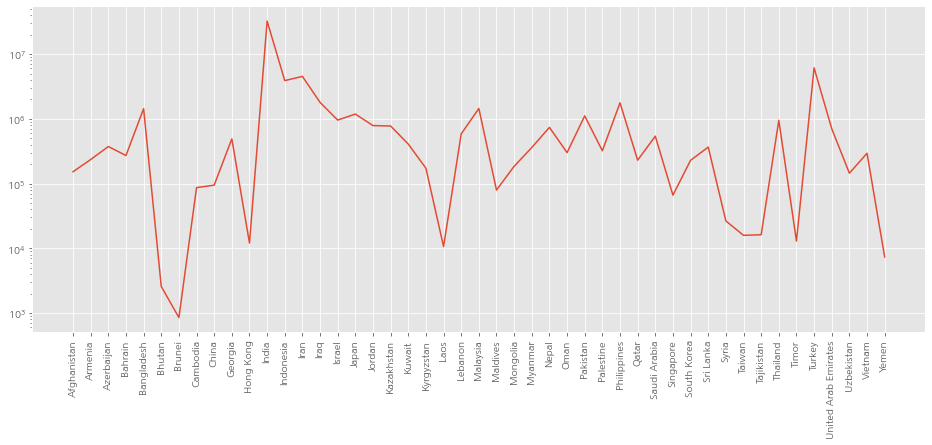

In [ ]:
# 아시아 국가별 누적 확진자 수 그래프 보기
x = df[df.continent=='Asia'].groupby(df.location)[['total_cases']].max()
# NaN 제거
x = x[~x.total_cases.isna()]
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(x)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 아시아 국가별 신규확진자 통계치 보기
df[df.continent=='Asia'].groupby(df.location)['new_cases'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,541.00,281.41,572.34,0.00,27.00,82.00,253.00,"5,721.00"
Armenia,535.00,439.57,494.52,0.00,122.00,256.00,555.50,"2,476.00"
Azerbaijan,535.00,697.52,"1,002.72",0.00,109.00,278.00,782.00,"4,451.00"
Bahrain,541.00,501.16,525.86,0.00,162.00,360.00,651.00,"3,273.00"
Bangladesh,528.00,"2,714.77","3,087.64",0.00,911.50,"1,737.50","3,031.75","16,230.00"
Bhutan,530.00,4.86,9.11,0.00,0.00,1.00,5.75,100.00
Brunei,527.00,1.62,7.73,0.00,0.00,0.00,0.00,83.00
Cambodia,569.00,152.19,283.48,0.00,0.00,1.00,63.00,"1,130.00"
China,573.00,164.08,843.24,-3.00,11.00,18.00,36.00,"15,133.00"


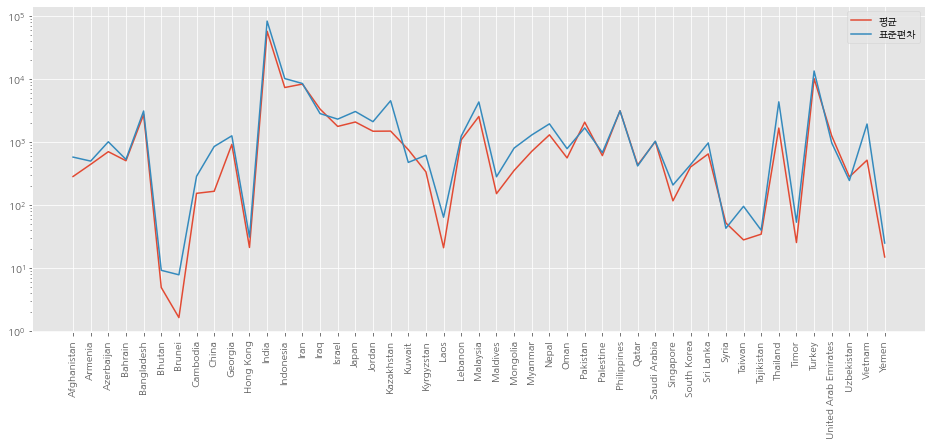

In [ ]:
# 아시아 국가의 일별 확진자 평균을 그래프로 그리기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.plot(df[df['continent']=='Asia'].groupby(df.location)['new_cases'].mean(), label='평균')
plt.plot(df[df['continent']=='Asia'].groupby(df.location)['new_cases'].std(), label='표준편차')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.show()

### 아시아국가 사망률 구해보기

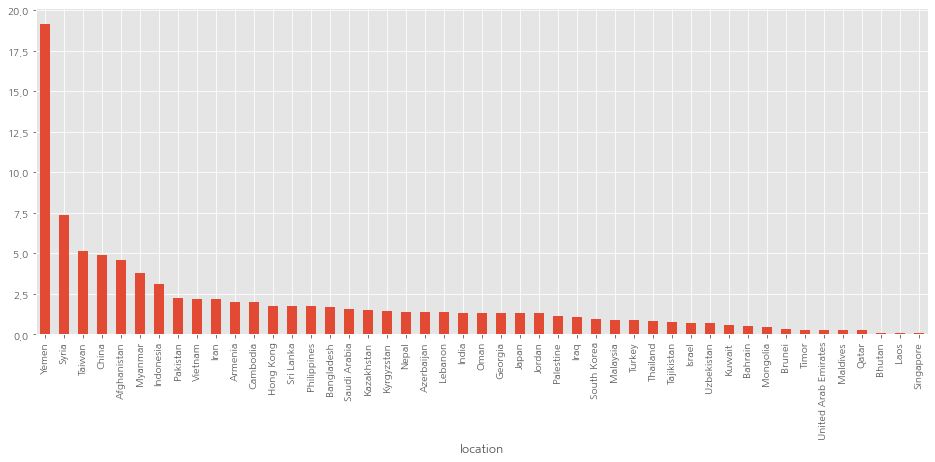

In [ ]:
# 사망률(누적사망자/누적확진자) 구하기
# death_ratio의 max를 구하면 안됨. total_cases의 최대값 행에 있는 death_ratio를 가져와야 함.
# 확진자 1에 사망자 1이면 사망률 1이 됨.
df['death_ratio']=df['total_deaths']/df['total_cases'] * 100 # %로 하기 위해 * 100
idx = df[df['continent'] == 'Asia'].total_cases.groupby(df.location).idxmax()
# NaN을 제거해야 출력이 됨.
idx = idx[~idx.isna()]
# 소수점 이하 두자리만 출력
pd.options.display.float_format = '{:,.2f}'.format
sorted = df.loc[idx, ['location', 'total_cases', 'death_ratio']]
sorted = sorted.sort_values(by='death_ratio', ascending=False)
sorted.index = sorted['location']
sorted = sorted[['total_cases', 'death_ratio']]
sorted
plt.figure(figsize=(16,6))
sorted['death_ratio'].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### 한국 데이터 처리하기

In [ ]:
# 한국의 최근 날짜와 신규확진자
df[df['location'] == 'South Korea'][['date','new_cases']].tail()

,date,new_cases
92793,2021-08-13,1929.0
92794,2021-08-14,1817.0
92795,2021-08-15,1553.0
92796,2021-08-16,1373.0
92797,2021-08-17,1803.0


In [ ]:
# 한국의 최근 날짜부터 신규사망자까지
df[df.location == 'South Korea'].loc[:,'date':'new_deaths'].tail()
# 한국의 날짜~사망자 데이터만 가져온다.
korea = df[df.location == 'South Korea'].loc[:,'date':'new_deaths']
korea.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
92793,2021-08-13,222111.0,1929.0,1840.429,2148.0,4.0
92794,2021-08-14,223928.0,1817.0,1853.143,2156.0,8.0
92795,2021-08-15,225481.0,1553.0,1861.857,2167.0,11.0
92796,2021-08-16,226854.0,1373.0,1838.143,2173.0,6.0
92797,2021-08-17,228657.0,1803.0,1778.714,2178.0,5.0


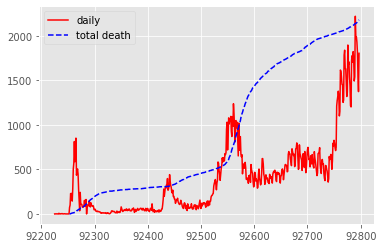

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 신규확진자 그래프
plt.plot(korea['new_cases'], 'r', label='daily')
plt.plot(korea['total_deaths'], 'b--', label='total death')
plt.legend()
plt.show()

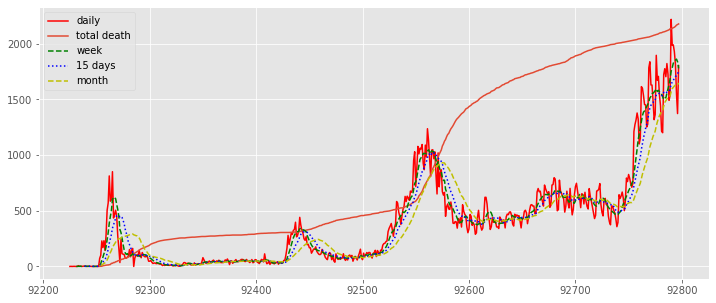

In [ ]:
# 7, 15, 30일 이동평균선 그래프
# 신규확진자 그래프
plt.figure(figsize=(12,5))
plt.plot(korea['new_cases'], 'r', label='daily')
plt.plot(korea['total_deaths'], label='total death')
ma_7 = korea['new_cases'].rolling(window=7).mean()
ma_15 = korea['new_cases'].rolling(window=15).mean()
ma_30 = korea['new_cases'].rolling(window=30).mean()
plt.plot(ma_7, 'g--', label='week')
plt.plot(ma_15, 'b:', label='15 days')
plt.plot(ma_30, 'y--', label='month')
plt.legend()
plt.show()

### 한국 요일별 데이터 분석하기

In [ ]:
import datetime
d = korea.iloc[0,0]
d = d.split('-')

In [ ]:
# 문자열을 날짜 객체로 변환한다.
d = datetime.datetime.strptime(korea.iloc[0,0], '%Y-%m-%d')
# 요일을 알아 본다.
d.strftime('%w')

'2'

In [ ]:
int(datetime.datetime.strptime(korea.iloc[0,0], '%Y-%m-%d').strftime('%w'))

2

In [ ]:
korea['weekday'] = 0
korea.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,weekday
92223,2020-01-21,NaN,NaN,NaN,NaN,NaN,0
92224,2020-01-22,1.0,NaN,NaN,NaN,NaN,0
92225,2020-01-23,1.0,0.0,NaN,NaN,NaN,0
92226,2020-01-24,2.0,1.0,NaN,NaN,NaN,0
92227,2020-01-25,2.0,0.0,NaN,NaN,NaN,0


In [ ]:
len(korea)

575

In [ ]:
for i in range(len(korea)) :
  weekday = int(datetime.datetime.strptime(korea.iloc[i,0], '%Y-%m-%d').strftime('%w'))
  korea.iloc[i, 6] = weekday

In [ ]:
korea.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,datestr,weekday
92793,2021-08-13,222111.0,1929.0,1840.429,2148.0,4.0,2021-08-13,5
92794,2021-08-14,223928.0,1817.0,1853.143,2156.0,8.0,2021-08-14,6
92795,2021-08-15,225481.0,1553.0,1861.857,2167.0,11.0,2021-08-15,0
92796,2021-08-16,226854.0,1373.0,1838.143,2173.0,6.0,2021-08-16,1
92797,2021-08-17,228657.0,1803.0,1778.714,2178.0,5.0,2021-08-17,2


일요일 평균 : 341.44 확진, 3.60 사망
월요일 평균 : 344.27 확진, 4.60 사망
화요일 평균 : 450.06 확진, 3.77 사망
수요일 평균 : 425.79 확진, 3.99 사망
목요일 평균 : 419.10 확진, 4.35 사망
금요일 평균 : 416.23 확진, 3.99 사망
토요일 평균 : 396.79 확진, 3.68 사망


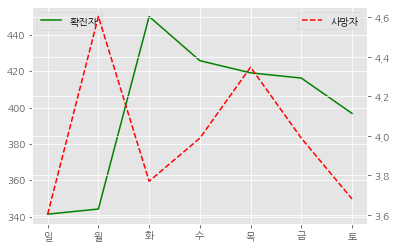

In [ ]:
w = ['일', '월', '화', '수', '목', '금', '토']
week_new_cases = [0] * 7
week_new_deaths = [0] * 7
for i in range(7) :
  week_new_cases[i] = korea[korea["weekday"] == i]["new_cases"].mean()
  week_new_deaths[i] = korea[korea["weekday"] == i]["new_deaths"].mean()
  print(f'{w[i]}요일 평균 : {week_new_cases[i]:.2f} 확진, {week_new_deaths[i]:.2f} 사망')

plt.rc('font', family='NanumGothic') 
fig, ax1 = plt.subplots()
ax1.plot(range(7), week_new_cases, 'g', label='확진자')
ax2 = ax1.twinx()
ax2.plot(range(7), week_new_deaths, 'r--', label='사망자')
plt.xticks(range(7), w)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# 공공데이터 포털 활용
- 사이트 : https://www.data.go.kr/data/15043378/openapi.do
- 인증키 encoding : 23hpMC2wthI0vK%2BInG1f9G4Q16%2BoZjf9h86PYrablkTQ4k5Pv0L%2FGK9TfTVfOWnCHClFrDV304G6UXRfDxpmwg%3D%3D
- 인증키 decoding : 23hpMC2wthI0vK+InG1f9G4Q16+oZjf9h86PYrablkTQ4k5Pv0L/GK9TfTVfOWnCHClFrDV304G6UXRfDxpmwg==
- 확인 : https://www.data.go.kr/iim/api/selectAPIAcountView.do 
- 참고 사이트 : https://yogyui.tistory.com/entry/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8F%AC%ED%84%B8%EC%BD%94%EB%A1%9C%EB%82%9819-%EA%B0%90%EC%97%BC%ED%98%84%ED%99%A9-%EB%8D%B0%EC%9D%B4%ED%84%B0-OpenAPI-%EC%97%B0%EB%8F%99 

## 요청 메시지
- serviceKey : 인증키, URL Encode
- numOfRows : 한 페이지 결과 수, 정수
- pageNo : 페이지 번호, 정수
- startCreate_dt : 데이터 생성일 시작 범위, 20200410
- endCreateDt : 데이터 생성일 종료 범위

## 응답 메시지
항목명(영문)	항목명(국문)	항목크기	항목구분	샘플데이터	항목설명

resultCode	결과코드	2	1	00	결과코드

resultMsg	결과메세지	50	1	NORMAL SERVICE	결과메시지

numOfRows	한 페이지 결과 수	4	1	10	한 페이지당 표출 데이터 수

pageNo	페이지 수	4	1	1	페이지 수

totalCount	전체 결과 수	4	1	2	전체 결과 수

SEQ	게시글번호(국내 시도별 발생현황 고유값)	30	1	1014	게시글번호(국내 시도별 발생현황 고유값)

CREATE_DT	등록일시분초	30	1	2020-04-10 11:17:34.589	등록일시분초

DEATH_CNT	사망자 수	15	1	0	사망자 수

GUBUN	시도명(한글)	30	1	검역	시도명(한글)

GUBUN_CN	시도명(중국어)	30	1	隔離區	시도명(중국어)

GUBUN_EN	시도명(영어)	30	1	Lazaretto	시도명(영어)

INC_DEC	전일대비 증감 수	15	1	4	전일대비 증감 수

ISOL_CLEAR_CNT	격리 해제 수	15	1	349	격리 해제 수

QUR_RATE	10만명당 발생률	30	1	-	10만명당 발생률

STD_DAY	기준일시	30	1	2020년 04월 10일 00시	기준일시

UPDATE_DT	수정일시분초 	30	1	null	수정일시분초 

DEF_CNT	확진자 수	15	1	13561	확진자 수

ISOL_ING_CNT	격리중 환자수	15	1	9	격리중 환자수

OVER_FLOW_CNT	해외유입 수	15	1	14	해외유입 수

LOCAL_OCC_CNT	지역발생 수 	15	1	7	지역발생 수 



In [ ]:
!pip install --upgrade pandas

In [ ]:
import pandas as pd
pd.__version__

'1.3.2'

In [ ]:
import pandas as pd
# pandas 1.3.0 이상에서는 read_xml 을 사용할 수 있다.
key = '23hpMC2wthI0vK%2BInG1f9G4Q16%2BoZjf9h86PYrablkTQ4k5Pv0L%2FGK9TfTVfOWnCHClFrDV304G6UXRfDxpmwg%3D%3D'
sdate ='20210101'
edate = '20210821'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=' + key + '&pageNo=1&numOfRows=10&startCreateDt='+sdate+'&endCreateDt=' + edate

df = pd.read_xml(url, xpath='.//item')

In [ ]:
df.count()

createDt        4427
deathCnt        4427
defCnt          4427
gubun           4427
gubunCn         4427
gubunEn         4427
incDec          4427
isolClearCnt    4427
isolIngCnt      4427
localOccCnt     4427
overFlowCnt     4427
qurRate         4427
seq             4427
stdDay          4427
updateDt         380
dtype: int64

In [ ]:
df.tail(10)

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
4417,2021-01-01 9:41:33.33,271,14735,경기,京畿,Gyeonggi-do,284,10535,3929,271,13,42.62,6762,2021년 01월 01일 00시,NaN
4418,2021-01-01 9:41:33.33,1,150,세종,世宗,Sejong,1,129,20,1,0,23.95,6761,2021년 01월 01일 00시,NaN
4419,2021-01-01 9:41:33.33,26,716,울산,蔚山,Ulsan,43,457,233,43,0,14.38,6760,2021년 01월 01일 00시,NaN
4420,2021-01-01 9:41:33.33,7,856,대전,大田,Daejeon,11,689,160,11,0,30.12,6759,2021년 01월 01일 00시,NaN
4421,2021-01-01 9:41:33.33,6,1098,광주,光州,Gwangju,17,864,228,16,1,35.42,6758,2021년 01월 01일 00시,NaN
4422,2021-01-01 9:41:33.33,29,2904,인천,仁川,Incheon,65,2150,725,63,2,35.93,6757,2021년 01월 01일 00시,NaN
4423,2021-01-01 9:41:33.33,201,7844,대구,大邱,Daegu,43,7294,349,43,0,294.85,6756,2021년 01월 01일 00시,NaN
4424,2021-01-01 9:41:33.33,50,1925,부산,釜山,Busan,57,1370,505,55,2,17.59,6755,2021년 01월 01일 00시,NaN
4425,2021-01-01 9:41:33.33,182,19362,서울,首尔,Seoul,358,10787,8393,357,1,64.44,6754,2021년 01월 01일 00시,2021-01-03 10:39:19.19
4426,2021-01-01 09:41:32.974,917,61754,합계,合计,Total,1027,42953,17884,1002,25,52.62,6753,2021년 01월 01일 00시,2021-06-01 18:30:02.099


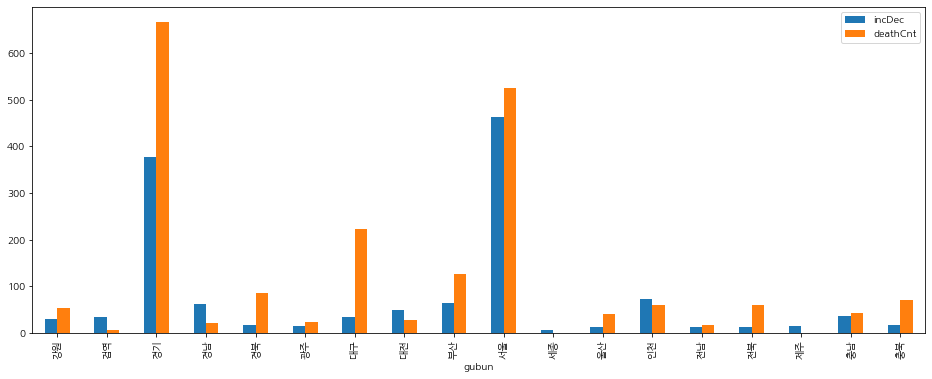

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
pd.options.display.float_format = '{:,.2f}'.format
# 8월 데이터만 가져온다.
aug = df[df['createDt'].str.contains('2021-08-')]
# 7월 데이터만 가져온다.
jul = df[df['createDt'].str.contains('2021-07-')]
mon = df[df['createDt'].str.contains('2021-')]
#mon = pd.concat([jul, aug])
year2021 = mon[['incDec', 'deathCnt']].groupby(jul.gubun).mean()[:-1]
year2021.plot(kind='bar', figsize=(16,6))

In [ ]:
mon.count()

createDt        4427
deathCnt        4427
defCnt          4427
gubun           4427
gubunCn         4427
gubunEn         4427
incDec          4427
isolClearCnt    4427
isolIngCnt      4427
localOccCnt     4427
overFlowCnt     4427
qurRate         4427
seq             4427
stdDay          4427
updateDt         380
dtype: int64

In [ ]:
# 날짜에 특정 문자열(예:2021-08-20)이 포함되어 있는 행만 가져온다.
x = df[df['createDt'].str.contains('2021-08-20')][['createDt', 'gubun', 'incDec', 'deathCnt']]
x

,createDt,gubun,incDec,deathCnt
19,2021-08-20 09:34:17.039,검역,13,13
20,2021-08-20 09:34:17.039,제주,56,1
21,2021-08-20 09:34:17.039,경남,90,26
22,2021-08-20 09:34:17.039,경북,67,88
23,2021-08-20 09:34:17.039,전남,23,19
24,2021-08-20 09:34:17.039,전북,40,60
25,2021-08-20 09:34:17.039,충남,76,49
26,2021-08-20 09:34:17.038,충북,44,72
27,2021-08-20 09:34:17.038,강원,28,58
28,2021-08-20 09:34:17.038,경기,645,715


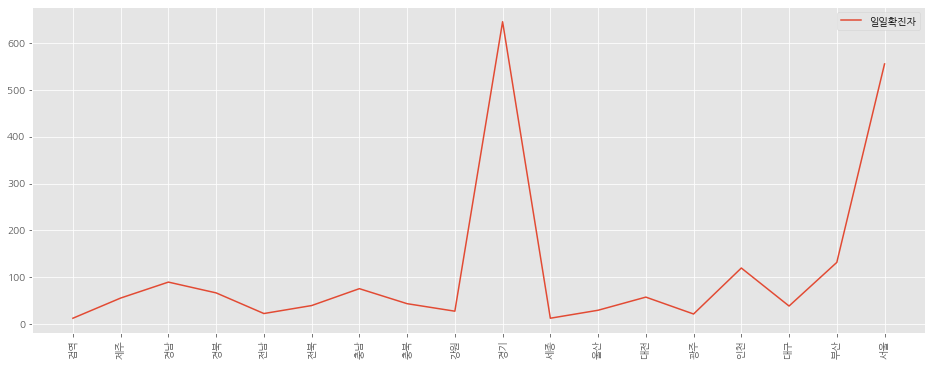

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
# 마지막 행은 제외해야 하므로 :-1로 슬라이싱해 준다.
plt.plot(x[['incDec']][:-1], label='일일확진자')
xt = list(x['gubun'][:-1])
plt.xticks(range(19, 37), xt, rotation=90)
plt.legend()
plt.show()

In [ ]:
# 일일 사망자수 구하기
df1 = df
df1['deathInc'] = 0

for i in range(len(df1)-20) :
  df1.loc[i, 'deathInc'] = df1.loc[i, 'deathCnt'] - df1.loc[i+19, 'deathCnt']
df1.to_csv('covid19-kor.csv', encoding='utf-8')

In [ ]:
df1[['gubun','deathCnt', 'deathInc']].head(30)

,gubun,deathCnt,deathInc
0,검역,13,0
1,제주,1,0
2,경남,27,1
3,경북,88,0
4,전남,19,0
5,전북,60,0
6,충남,49,0
7,충북,72,0
8,강원,58,0
9,경기,716,1


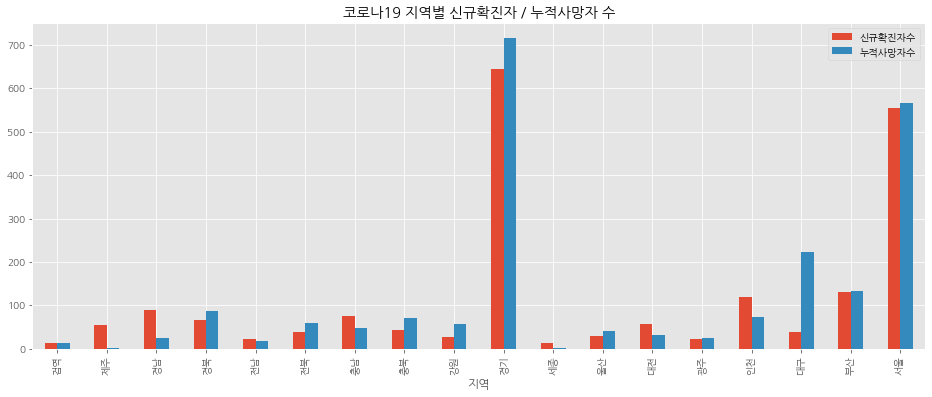

In [ ]:
  # 신규확진자 및 사망자 수 바그래프 그리기
# 해당 날짜의 지역(gubun), 신규 확진자수(incDec), 누적 사망자수(deathCnt) 가져오기
x = df1[df1['createDt'].str.contains('2021-08-20')][['gubun', 'incDec', 'deathCnt']]
# 인덱스(행) 이름을 지역으로 변경, x축 라벨로 사용됨
x.index = x['gubun']
# 마지막행 제외, incDec와 deathCnt 열만 가져 온다.
x = x.iloc[:-1, 1:]
# 열 명이 라벨로 사용되므로 변경해 준다.
x.columns = ['신규확진자수', '누적사망자수']
# index가 x 축 이름이 되므로 변경해 준다.
x.index.name='지역'
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.style.use('ggplot')
x.plot(kind='bar', title='코로나19 지역별 신규확진자 / 누적사망자 수', figsize=(16,6))
plt.show()

In [ ]:
# 실행 시간 측정
import time, math
now = time.time()
for i in range(10000000) :
  math.sqrt(i)
time.time() - now

1.6685802936553955